In [1]:
# Install necessary libraries (uncomment if not already installed)
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
# Load the dataset and handle any missing values
data = pd.read_csv('heart.csv')
if data.isnull().sum().any():
    data.fillna(data.mean(), inplace=True)

# Define the features and the target output
x = data.drop('target', axis=1)
y = data['target']

if y.nunique() != 2:
    raise ValueError("Target variable must be binary for logistic regression.")

# Split dataset into testing and training sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [4]:
# Three ML Algorithms used and tested against
models = {
    # Logistic Regression with 1000 maximum number of iterations and optimization algorithm 'lbfgs'
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),

    # Neural Network with two hidden layers (64 and 32 neurons), 1000 maximum number of iterations, and random state 42
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),

    # Naive Bayes with default parameters (Gaussian Naive Bayes)
    'Naive Bayes': GaussianNB()
}

results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

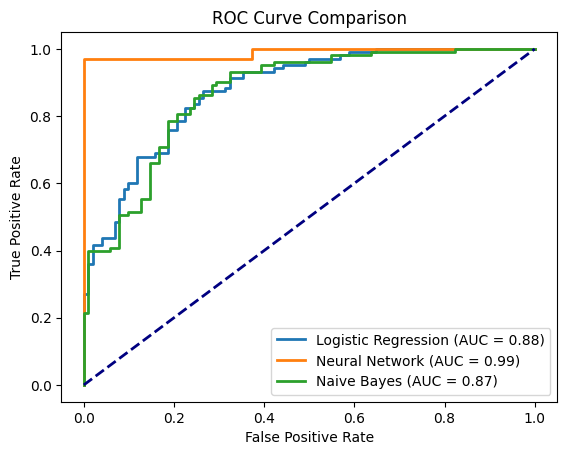

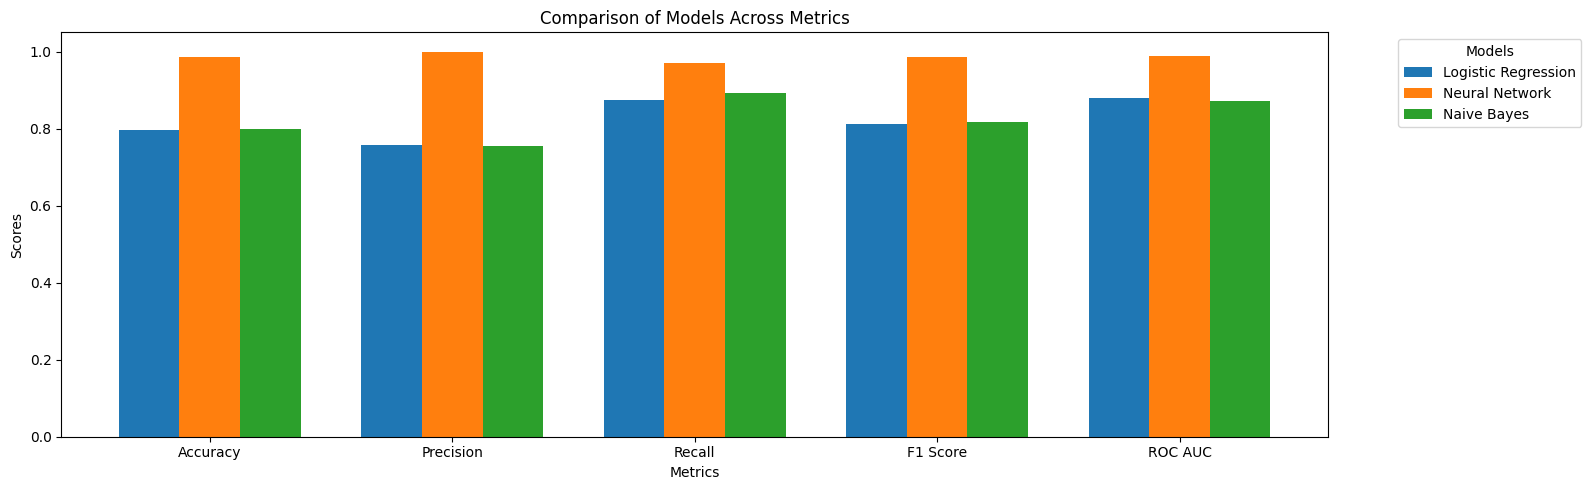

In [5]:
# Plot each model's metrics
for name, model in models.items():
    model.fit(xTrainScaled, yTrain)

    predictions = model.predict(xTestScaled)

    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(xTestScaled)[:, 1]
    else:
        probas = predictions

    accuracy = accuracy_score(yTest, predictions)
    precision = precision_score(yTest, predictions)
    recall = recall_score(yTest, predictions)
    f1 = f1_score(yTest, predictions)
    fpr, tpr, _ = roc_curve(yTest, probas)
    roc_auc = auc(fpr, tpr)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

resultsDf = pd.DataFrame(results)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

nMetrics = len(metrics)

x = np.arange(nMetrics)

fig, ax = plt.subplots(figsize=(16, 5))

for i, model in enumerate(resultsDf['Model']):
    ax.bar(x + i * 0.25, resultsDf.loc[resultsDf['Model'] == model, metrics].values[0], 0.25, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models Across Metrics')
ax.set_xticks(x + 0.25 * (len(resultsDf['Model']) - 1) / 2)
ax.set_xticklabels(metrics)

ax.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [6]:
# Print the results of each metric for each model
print(resultsDf)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.795122   0.756303  0.873786  0.810811  0.878736
1       Neural Network  0.985366   1.000000  0.970874  0.985222  0.989149
2          Naive Bayes  0.800000   0.754098  0.893204  0.817778  0.870550


In [7]:
# Function to take user input for prediction
def predictHeartDisease(model, scaler):

    print("Enter the following values to predict heart disease risk:")

    fields = [
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal'
    ]
    userInput = []

    for field in fields:
        value = float(input(f"{field}: "))
        userInput.append(value)

    userData = pd.DataFrame([userInput], columns=fields)

    userDataScaled = scaler.transform(userData)

    prediction = model.predict(userDataScaled)[0]

    if hasattr(model, "predict_proba"):
        confidence = model.predict_proba(userDataScaled)[0][prediction]
    else:
        confidence = None

    if prediction == 1:
        print(f"Prediction: High Risk of Heart Disease")
    else:
        print(f"Prediction: Low Risk of Heart Disease")

    if confidence is not None:
        print(f"Confidence Score: {confidence:.2f}")

In [8]:
predictHeartDisease(models['Neural Network'], scaler)

Enter the following values to predict heart disease risk:
Prediction: Low Risk of Heart Disease
Confidence Score: 1.00
